<!--Header-->
<div>
    <div class="row" style="color: #4D4D4D;font-size: 15px;padding-bottom: 20px">
        <div class="col-md-7">
            <img src="http://materials.cv.uoc.edu/cdocent/common/img/logo-uoc.png" alt="Logo UOC" class="img-responsive" style="margin:20px 0px 0px">
        </div>
        <div class="col-md-5">
            <h1 style="margin:15px 0px 0px;font-size: 40px;">M2.851 Tipología y ciclo de vida de los datos</h1>
            <div style="text-align:left;margin-top: 5px;"></div>
        </div>
    </div>
    <div class="row" style="background: #FCB517;padding: 10px 20px;">
        <div class="col-md-6">
            <div>PRAC 2</div>
        </div>
        <div class="col-md-6">
            <div style="text-align:right;">Autor: Javier Moreno Garcia</div>
        </div>
    </div>
</div>
<!--/Header-->

## 1. Descripción del dataset. ¿Por qué es importante y qué pregunta/problema pretende responder?

He elegido el data set “Titanic: Machine Learning from Disaster”.

El data set me parece interesante en la medida en que nos permitirá analizar que características tenían los pasajeros que sobrevivieron. 

Además podremos diseñar un modelo para hacer predecicciones de supervivencia usando los datos de entrenamiento y prueba.

## 2. Integración y selección de los datos de interés a analizar.

A continuación presento los atributos:

* survival: booleano (0 - no y 1 - sí).
* pclass: string con clase del billete (1 - primera, 2 - segunda y 3 - tercera)
* sexo: string (male y female)
* edad: decimal representando la edad en años.
* sibsp: numérico con el número de hermanos/ hermanas/ cónyuges en el barco.
* parch: numérico con el número de padres/ hijos en el barco.
* ticket: numérico con el id de billete.
* fare: numérico con el precio del billete.
* cabin: numérico con el id de cabina.
* embarked: string con el puerto de embarque (C, Q, S)

Vamos a echarle un vistazo a los datos y a su estructura.


In [1]:
import pandas as pd
import numpy as np

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Visualizamos las 5 primeras filas.


In [2]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Por último, vamos a ver estadísticas generales de los datos.

In [3]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3. Limpieza de los datos

Vamos a crear nuevos atributos y eliminaremos otros que no usaremos:


In [4]:
# Train

train_df['_Relatives'] = train_df['SibSp'] + train_df['Parch']
train_df["_Salutation"] = train_df.Name.str.split(',').str[1].str.split('.').str[0]
train_df['_Sex'] = np.where(train_df['Sex'] == 'male', 1, 0)

train_df.drop('PassengerId', axis=1, inplace=True)
train_df.drop('Name', axis=1, inplace=True)
train_df.drop('SibSp', axis=1, inplace=True)
train_df.drop('Parch', axis=1, inplace=True)
train_df.drop('Ticket', axis=1, inplace=True)
train_df.drop('Fare', axis=1, inplace=True)
train_df.drop('Cabin', axis=1, inplace=True)
train_df.drop('Embarked', axis=1, inplace=True)


# Test

test_df['_Relatives'] = test_df['SibSp'] + test_df['Parch']
test_df["_Salutation"] = test_df.Name.str.split(',').str[1].str.split('.').str[0]
test_df['_Sex'] = np.where(test_df['Sex'] == 'male', 1, 0)

test_df.drop('PassengerId', axis=1, inplace=True)
test_df.drop('Name', axis=1, inplace=True)
test_df.drop('SibSp', axis=1, inplace=True)
test_df.drop('Parch', axis=1, inplace=True)
test_df.drop('Ticket', axis=1, inplace=True)
test_df.drop('Fare', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Embarked', axis=1, inplace=True)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
_Relatives     891 non-null int64
_Salutation    891 non-null object
_Sex           891 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


### 3.1 ¿Los datos contienen ceros o elementos vacíos? ¿Cómo gestionarías cada uno de estos casos?

Vamos a obtener el número de datos vacíos así como su porcentaje.

In [5]:
train_df_num_na = train_df.isna().sum().sort_values(ascending=False)
train_df_percent_na = (round(train_df.isna().sum() / train_df.isna().count() * 100, 1)).sort_values(ascending=False)

test_df_num_na = test_df.isna().sum().sort_values(ascending=False)
test_df_percent_na = (round(test_df.isna().sum() / test_df.isna().count() * 100, 1)).sort_values(ascending=False)

pd.concat([train_df_num_na, train_df_percent_na], axis=1, keys=['Number', 'Percent'])


,Number,Percent
Age,177,19.9
_Sex,0,0.0
_Salutation,0,0.0
_Relatives,0,0.0
Sex,0,0.0
Pclass,0,0.0
Survived,0,0.0


Para el atributo Age vamos a introducir la edad mediana según el saludo (dentro del atributo name) y en caso de que no haya saludo, usaremos la edad mediana de todo el data set.

In [6]:
# Rellenamos Age en data set train

train_df_age_salulation = train_df.loc[train_df['Age'].notnull(), ['Age', '_Salutation']]

train_df_salulation = train_df_age_salulation.iloc[:,1]

train_df_salulation_grouped_by_median = train_df.groupby("_Salutation", as_index=False).Age.median()

train_df_age_salulation_joined = train_df.merge(train_df_salulation_grouped_by_median, on="_Salutation", how="inner")
train_df.Age = train_df.Age.fillna(train_df_age_salulation_joined.Age_y, axis=0)

# Eliminamos _Salutation en data set train

train_df.drop('_Salutation', axis=1, inplace=True)

# Rellenamos Age en data set test

test_df_age_salulation = test_df.loc[test_df['Age'].notnull(), ['Age', '_Salutation']]

test_df_salulation = test_df_age_salulation.iloc[:,1]

test_df_salulation_grouped_by_median = test_df.groupby("_Salutation", as_index=False).Age.median()

test_df_age_salulation_joined = test_df.merge(test_df_salulation_grouped_by_median, on="_Salutation", how="inner")
test_df.Age = test_df.Age.fillna(test_df_age_salulation_joined.Age_y, axis=0)

# Eliminamos _Salutation en data set test

test_df.drop('_Salutation', axis=1, inplace=True)


Comprobamos que ya no tenemos valores vacíos.

In [7]:
train_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
_Relatives    0
_Sex          0
dtype: int64

### 3.2 Identificación y tratamiento de valores extremos.


Primero vamos a mostrar los atributos no categóricos. Para ello partiremos de la base de que no son categórico si poseen más de 5 valores distintos.

In [8]:
for i in train_df.columns:
    cat_dat = pd.Categorical(train_df[i])
    if len(cat_dat.categories) > 5:
        print(i, ' is not categoric.')        

Age  is not categoric.
_Relatives  is not categoric.


De los atributos mostrados, Age y Relatives son numéricos por lo que estudiaremos sus valores extremos.

A continuación mostramos aquellos valores de Age situados a más de 3 desviaciones standares.

In [9]:
from scipy import stats

z_age = np.abs(stats.zscore(train_df.Age))
train_df.loc[np.where(z_age > 3)].Age

96     71.0
116    70.5
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
888    70.0
Name: Age, dtype: float64

Si bien son valores extremos, entran dentro de un rango de edad normal por lo que no haremos ningún tratamiento.

Tampoco tenemos valores extremos que necesiten tratamiento en Relatives.

In [10]:
train_df._Relatives.describe()

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: _Relatives, dtype: float64

## 4. Análisis de los datos.


### 4.1 Selección de los grupos de datos que se quieren analizar/comparar (planificación de los análisis a aplicar).


Los datos que nos interesan son aquellos que están intimamente relacionados con la variable Survived: 

* Sex:
* Pclass:
* Age
* Relatives

### 4.2 Comprobación de la normalidad y homogeneidad de la varianza.


Vamos a comprobar la normalidad de los atributos Age y Relatives usando el test Shapiro-Wilk

In [11]:
from numpy.random import seed
from scipy.stats import shapiro

seed(1)

for att_name in ['Age', '_Relatives']:

    stat, p = shapiro(train_df[att_name])

    print('ShapiroResult(statistic=%s, p=%s)' % (stat, p))

ShapiroResult(statistic=0.9715546369552612, p=3.523918136461024e-12)
ShapiroResult(statistic=0.6150774955749512, p=1.5671141116083727e-40)


Puesto que los valores de p son menores a 0.05, concluimos que los datos no siguen una distribución normal o lo que es lo mismo que la diferencia entre los datos y la distribución normal es lo suficientemente grande para ser significativa estadisticamente hablando.


Seguidamente comprobaremos la homogeneidad de la varianza respecto de los atributos Age y Relatives. Usaremos el test de Fligner-Killeen puesto que los datos no siguen una distribucion normal.

In [12]:
from scipy.stats import fligner

fligner(train_df.Age, train_df._Relatives, center = 'median')

FlignerResult(statistic=694.8131935472903, pvalue=4.014350221424812e-153)

El valor de p es nuevamente menor que 0.05 por lo que no podemos aceptar la hipótetis de que las varianzas son homogeneas.

### 4.3 Aplicación de pruebas estadísticas para comparar los grupos de datos. En función de los datos y el objetivo del estudio, aplicar pruebas de contraste de hipótesis, correlaciones, regresiones, etc. Aplicar al menos tres métodos de análisis diferentes.

A continuación vamos a ejecutar un contraste de hipótesis entre Sex y Survived usando t-test.

Queremos demostrar que el sexo de la persona jugó un rol fundamental en la supervivenvcia de la misma en el hundimiento.

In [13]:
train_df_male = train_df[train_df['Sex'] == 'male']
train_df_female = train_df[train_df['Sex'] == 'female']

stats.ttest_ind(train_df_male.Survived, train_df_female.Survived)


Ttest_indResult(statistic=-19.29781655012335, pvalue=1.4060661308802594e-69)

Puesto que el valor p es menor que 0.5, podemos aceptar la hipotesis nula y aceptar que el sexo estuvo muy relacionado con la supervivencia de la persona.

Vamos a obtener una matriz de las correlaciones entre las variables.

In [14]:
train_df_corr = train_df.corr(method ='pearson')

train_df_corr

,Survived,Pclass,Age,_Relatives,_Sex
Survived,1.000000,-0.338481,-0.067389,0.016639,-0.543351
Pclass,-0.338481,1.000000,-0.322766,0.065997,0.131900
Age,-0.067389,-0.322766,1.000000,-0.252496,0.066267
_Relatives,0.016639,0.065997,-0.252496,1.000000,-0.200988
_Sex,-0.543351,0.131900,0.066267,-0.200988,1.000000


Podemos tomar la matrix de correlacion y ordenar de mayor a menor los atributos más correlacionados con la supervivencia.

In [15]:
train_df_corr.Survived.abs().sort_values(ascending=False)[1:]

_Sex          0.543351
Pclass        0.338481
Age           0.067389
_Relatives    0.016639
Name: Survived, dtype: float64

Vamos a crear un modelo para resolver la variable Survived usando regresion lineal.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

train_df_x = train_df.drop(["Survived","Sex"],axis=1)
train_df_y = train_df["Survived"]

train_df_x_train, train_df_x_test, train_df_y_train, train_df_y_test = train_test_split(train_df_x, train_df_y, test_size = 0.5)

train_df_logic_model = LogisticRegression(solver = 'lbfgs')
train_df_logic_model.fit(train_df_x_train, train_df_y_train)

train_df_logic_model_predictions = train_df_logic_model.predict(train_df_x_test)

print(classification_report(train_df_y_test, train_df_logic_model_predictions))


              precision    recall  f1-score   support

           0       0.77      0.89      0.83       263
           1       0.79      0.63      0.70       183

    accuracy                           0.78       446
   macro avg       0.78      0.76      0.76       446
weighted avg       0.78      0.78      0.77       446



El modelo generado tiene una precisión cercana al 80%. 

Veamos a continuación la matriz de confusión.

In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train_df_y_test, train_df_logic_model_predictions)

array([[233,  30],
       [ 68, 115]])

Los valores que aparecen arriba vienen a representar el número de: verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos respectivamente.

Vamos a repetir el proceso usando SDG (Stochastic Gradient Descent)

In [18]:
from sklearn import linear_model

sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(train_df_x_train, train_df_y_train)

print('Score', sgd.score(train_df_x_train, train_df_y_train))

Score 0.5348314606741573


Reptimos el proceso usando ahora Random Forest.

In [19]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_df_x_train, train_df_y_train)

print('Score', random_forest.score(train_df_x_train, train_df_y_train))

Score 0.9415730337078652


Reptimos finalmente el proceso usando K Nearest Neighbor.

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(train_df_x_train, train_df_y_train)

print('Score', knn.score(train_df_x_train, train_df_y_train) * 100)

Score 86.96629213483146


Concluimos que el modelo usando Random Forest es el más preciso.

### 5. Representación de los resultados a partir de tablas y gráficas

Comenzamos mostrando un histograma con las edades de los pasajeros.

In [21]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

sns.distplot(train_df['Age'])

A continmuación vamos a mostrar la relación entre las supervivencia y las variables más correlacionadas.

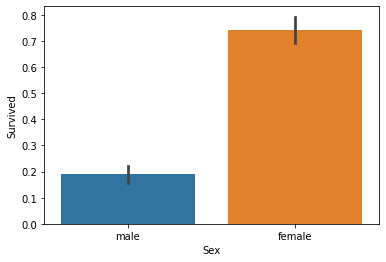

In [22]:
sns.barplot(x='Sex', y='Survived', data=train_df)

Se puede observar claramente que las mujeres sobrevivieron en gran mayor medida a los hombres.

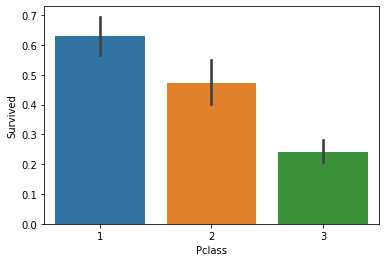

In [23]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

Las posibilidades de supervivencia de los viajeros fueron también mejores según la clase de su billete.

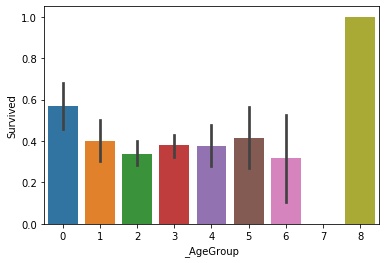

In [24]:
train_df['_AgeGroup'] = (train_df['Age'] /10).astype(int)

sns.barplot(x='_AgeGroup', y='Survived', data=train_df)

Vemos que no hay una relación muy clara entre la supervivencia y la edad de los viajeros.

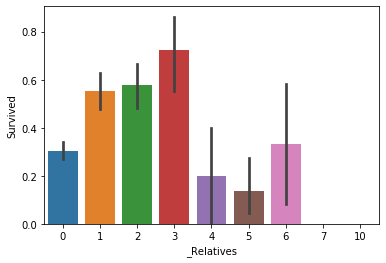

In [25]:
sns.barplot(x='_Relatives', y='Survived', data=train_df)

Tampoco observamos una relación muy clara entre la supervivencia y el número de familiares.

### 6. Resolución del problema. A partir de los resultados obtenidos, ¿cuáles son las conclusiones? ¿Los resultados permiten responder al problema?


La concusión que obtengo del análisis del data set es que los pasajeros con mayores posibilidades de supervivencia fueron mujeres con billetes en la primera y segunda clase. 

Por contra los hombres tuvieron muchísimas menos posibilidades de supervivencia, especialmente aquellos con billetes en la segunda y tercera clase.

Lo podemos ver claramente en la gráfica a conitunuación.

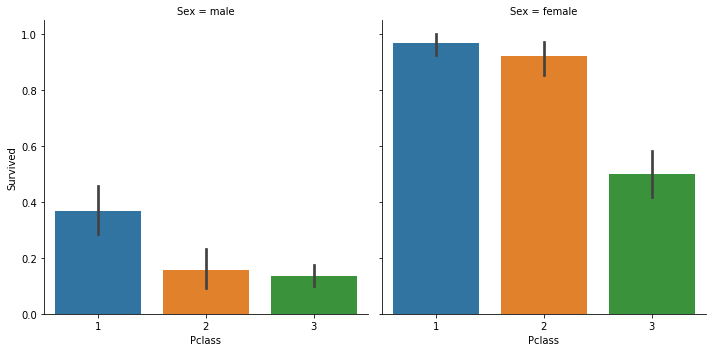

In [26]:
sns.catplot("Pclass", "Survived", col="Sex", data=train_df, kind="bar")

## 7. Código: Hay que adjuntar el código, preferiblemente en R, con el que se ha realizado la limpieza, análisis y representación de los datos. Si lo preferís, también podéis trabajar en Python.

El repositorio con el código se encuentra en:

https://github.com/javmg/titanic-dataset-cleaning

<!--Footer-->
 <div style="background: #333333;padding: 35px 0px;margin-top: 25px;">
    <div class="row">
     <div class="col-sm-12">
        <img src="http://materials.cv.uoc.edu/cdocent/common/img/logo-uoc-bottom.png" alt="Logo UOC" class="img-responsive" style="margin: 0 auto; display: block;">
    </div>
</div>
</div>
<!--/Footer-->